# spliting datasets

In [1]:
import tensorflow as tf

In [4]:
import splitfolders
splitfolders.ratio('D:/Desktop Application/asl_dataset', output="output", seed=1337, ratio=(.7, 0.2,0.1)) 



Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  6.34 files/s]
Copying files: 5 files [00:00, 21.97 files/s]
Copying files: 14 files [00:00, 44.01 files/s]
Copying files: 23 files [00:00, 58.85 files/s]
Copying files: 34 files [00:00, 74.46 files/s]
Copying files: 45 files [00:00, 82.39 files/s]
Copying files: 54 files [00:00, 68.28 files/s]
Copying files: 62 files [00:01, 67.56 files/s]
Copying files: 70 files [00:01, 51.98 files/s]
Copying files: 76 files [00:01, 49.00 files/s]
Copying files: 82 files [00:01, 51.06 files/s]
Copying files: 91 files [00:01, 58.14 files/s]
Copying files: 99 files [00:01, 63.33 files/s]
Copying files: 109 files [00:01, 70.09 files/s]
Copying files: 117 files [00:01, 72.27 files/s]
Copying files: 125 files [00:02, 74.28 files/s]
Copying files: 133 files [00:02, 75.79 files/s]
Copying files: 141 files [00:02, 56.69 files/s]
Copying files: 148 files [00:02, 58.84 files/s]
Copying files: 156 files [00:02, 63.79 files/s]
Copying file

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(36, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       7385

In [15]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [16]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory("output/train",
                                            image_size=(180, 180), batch_size=25)

Found 1760 files belonging to 36 classes.


In [18]:
validation_dataset = image_dataset_from_directory("output/val",
                                             image_size=(180, 180),batch_size=25)

Found 503 files belonging to 36 classes.


In [19]:
test_dataset = image_dataset_from_directory("output/test",
                                             image_size=(180, 180),batch_size=25)

Found 252 files belonging to 36 classes.


In [20]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="Sign_Recognition_languages.keras",
 save_best_only=True,
 monitor="val_loss")
]

In [21]:
history = model.fit(
 train_dataset,epochs=15,
 validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/15
71/71 [==============================] - 184s 3s/step - loss: 10.6693 - accuracy: 0.6960 - val_loss: 0.6641 - val_accuracy: 0.7773
Epoch 2/15
71/71 [==============================] - 176s 2s/step - loss: 0.7715 - accuracy: 0.8761 - val_loss: 0.3897 - val_accuracy: 0.8867
Epoch 3/15
71/71 [==============================] - 175s 2s/step - loss: 0.2145 - accuracy: 0.9392 - val_loss: 0.9724 - val_accuracy: 0.8151
Epoch 4/15
71/71 [==============================] - 175s 2s/step - loss: 0.2059 - accuracy: 0.9636 - val_loss: 0.6608 - val_accuracy: 0.9085
Epoch 5/15
71/71 [==============================] - 173s 2s/step - loss: 0.2169 - accuracy: 0.9631 - val_loss: 0.5621 - val_accuracy: 0.9344
Epoch 6/15
71/71 [==============================] - 174s 2s/step - loss: 0.0990 - accuracy: 0.9824 - val_loss: 0.4374 - val_accuracy: 0.9404
Epoch 7/15
71/71 [==============================] - 180s 3s/step - loss: 0.0430 - accuracy: 0.9903 - val_loss: 0.6330 - val_accuracy: 0.9364
Epoch 8/15
7

In [22]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True )


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [23]:
model.save('Sign_Recognition_model_180.h5')

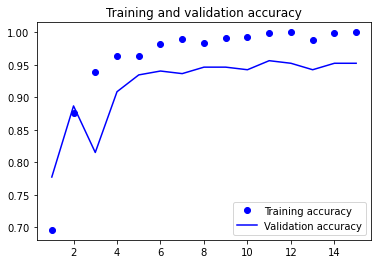

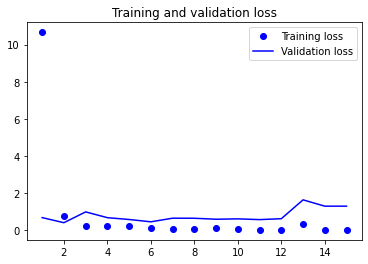

In [24]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [26]:
test_dataset = image_dataset_from_directory("output/test",
                                             image_size=(180, 180),batch_size=25)

Found 252 files belonging to 36 classes.


In [27]:
model.evaluate(test_dataset)

11/11 [==============================] - 7s 603ms/step - loss: 2.0235 - accuracy: 0.9246


[2.0234899520874023, 0.9246031641960144]

# Load Model

In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('Sign_Recognition_model_180.h5')

9


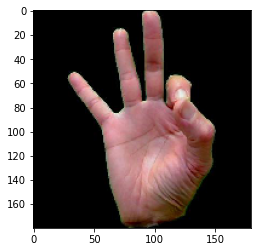

In [6]:
# for only one prediction
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
test_image = image.load_img('output/test/9/hand1_9_top_seg_2_cropped.jpeg',
                            target_size=(180,180))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)


if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
elif result[0][10] == 1:
    prediction = 'A'
elif result[0][11] == 1:
    prediction = 'B'
elif result[0][12] == 1:
    prediction = 'C'
elif result[0][13] == 1:
    prediction = 'D'
elif result[0][14] == 1:
    prediction = 'E'
elif result[0][15] == 1:
    prediction = 'F'
elif result[0][16] == 1:
    prediction = 'G'
elif result[0][17] == 1:
    prediction = 'H'
elif result[0][18] == 1:
    prediction = 'I'
elif result[0][19] == 1:
    prediction = 'J'
elif result[0][20] == 1:
    prediction = 'K'
elif result[0][21] == 1:
    prediction = 'L'
elif result[0][22] == 1:
    prediction = 'M'
elif result[0][23] == 1:
    prediction = 'N'
elif result[0][24] == 1:
    prediction = 'O'
elif result[0][25] == 1:
    prediction = 'P'
elif result[0][26] == 1:
    prediction = 'Q'
elif result[0][27] == 1:
    prediction = 'R'
elif result[0][28] == 1:
    prediction = 'S'
elif result[0][29] == 1:
    prediction = 'T'
elif result[0][30] == 1:
    prediction = 'U'
elif result[0][31] == 1:
    prediction = 'V'
elif result[0][32] == 1:
    prediction = 'W'
elif result[0][33] == 1:
    prediction = 'X'
elif result[0][34] == 1:
    prediction = 'Y'
elif result[0][35] == 1:
    prediction = 'Z'
else:
    prediction = ' NONE '
    
print(prediction)